In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_preprocess import load_and_preprocess_data
from model import create_model, save_model, convert_model_to_trt, load_trt_model
from augmentation import create_augmentation
from visualization import plot_sample_images, plot_misclassified_images, plot_training_history
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.metrics import accuracy_score
import numpy as np
import time

2024-01-02 19:00:25.867671: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-02 19:00:25.977565: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 19:00:25.977651: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 19:00:25.992996: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 19:00:26.029037: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Load and preprocess data
x_train, y_train, x_test, y_test = load_and_preprocess_data()

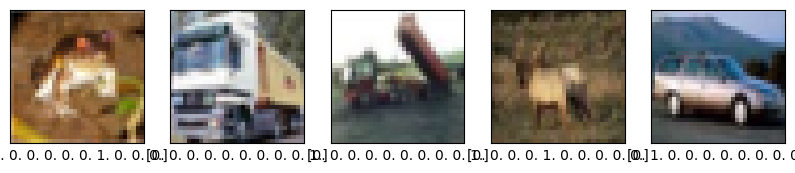

In [3]:
# Visualize training data 
plot_sample_images(x_train, y_train)

In [4]:
# Create and compile the model
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2024-01-02 19:00:28.720572: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-02 19:00:28.805991: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-02 19:00:28.806146: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
# Data augmentation
datagen = create_augmentation()
datagen.fit(x_train)

In [6]:
# Model checkpoints and early stopping
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
early_stop = EarlyStopping(patience=10)

In [7]:
# Create a TensorBoard callback instance.
# This will save logs to a subdirectory in the 'logs' directory.
# The subdirectory name is based on the current time to ensure uniqueness. 
tensorboard = TensorBoard(log_dir="logs/{}".format(time.time()))

In [8]:
# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), 
                epochs=50, 
                validation_data=(x_test, y_test), 
                callbacks=[checkpoint, early_stop, tensorboard])

Epoch 1/50


2024-01-02 19:00:30.444017: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-02 19:00:31.037579: I external/local_xla/xla/service/service.cc:168] XLA service 0x7efbfcd2e540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-02 19:00:31.037613: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-01-02 19:00:31.045586: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1704193231.116903   29310 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 21s 12ms/step - loss: 1.7337 - accuracy: 0.3537 - val_loss: 1.4183 - val_accuracy: 0.4941
Epoch 2/50
   6/1563 [..............................] - ETA: 18s - loss: 1.4605 - accuracy: 0.4375

/home/jimmy/python/v3.8/cifar-10_image_classification/.venv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 18s 11ms/step - loss: 1.4851 - accuracy: 0.4575 - val_loss: 1.2763 - val_accuracy: 0.5380
Epoch 3/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3659 - accuracy: 0.5103 - val_loss: 1.1999 - val_accuracy: 0.5744
Epoch 4/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2930 - accuracy: 0.5380 - val_loss: 1.2164 - val_accuracy: 0.5766
Epoch 5/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.2425 - accuracy: 0.5592 - val_loss: 1.0876 - val_accuracy: 0.6058
Epoch 6/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1901 - accuracy: 0.5767 - val_loss: 1.0581 - val_accuracy: 0.6256
Epoch 7/50
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1560 - accuracy: 0.5899 - val_loss: 1.0671 - val_accuracy: 0.6368
Epoch 8/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1297 - accuracy: 0.5990 - val_loss: 1.0266 - val_accura

In [9]:
 # Preserve and convert the model
save_model(model, 'saved_model/my_model')
convert_model_to_trt('saved_model/my_model', 'saved_model/my_model_trt')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


ERROR:tensorflow:Tensorflow needs to be built with TensorRT support enabled to allow TF-TRT to operate.


2024-01-02 19:15:15.558979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ERROR:tensorflow:Tensorflow needs to be built with TensorRT support enabled to allow TF-TRT to operate.


RuntimeError: Tensorflow has not been built with TensorRT support.

In [ ]:
# Load the optimized model
trt_model = load_trt_model('saved_model/my_model_trt')

In [ ]:
# Use the optimized model for inference 
trt_predictions = trt_model.predict(x_test, batch_size=64)

# Convert prediction results into category labels
predicted_classes = np.argmax(trt_predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy with TensorRT optimized model: {accuracy * 100:.2f}%")

# Visualize the inference results
plot_misclassified_images(x_test, true_classes, predicted_classes)

In [ ]:
 # Check if history object is created
if history is not None:
    plot_training_history(history)
else:
    print("Training did not complete successfully. No history object was created.")